# Task # 3 - To Explore Unsupervised Machine Learning

### Introduction
K-means is a type of unsupervised learning and one of the popular methods of clustering unlabelled data into k clusters. One of the trickier tasks in clustering is identifying the appropriate number of clusters k. In this task, we will provide an overview of how k-means works and discuss how to implement your own clusters. We will also understand how to use the elbow method as a way to estimate the value k. 


## K-means Overview
Before diving into the dataset, let us briefly discuss how k-means works: The process begins with k centroids initialised at random. These centroids are used to assign points to its nearest cluster. The mean of all points within the cluster is then used to update the position of the centroids. The above steps are repeated until the values of the centroids stabilise.

### Dataset
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx6 6b10YiwK-/view?usp=sharing

In [18]:
# import require packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Read the data 

In [9]:
data = pd.read_csv("E:/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Categorical and Continuous features

In [13]:
categorical_features = ['Species']
continuous_features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

### Descriptive statistics below shows the standard measurements of Petal and Sepal of the Iris flower

In [14]:
data[continuous_features].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To use the categorical features, we need to convert the categorical features to binary using pandas get dummies

In [16]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


### Scaling the continues features, Using Scikit-learns MInMaxScalar

In [19]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

### Read The Data

In [21]:
data = pd.read_csv('E:\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###  Split of categorical and continuous features

In [22]:
categorical_features = ['Species']
continuous_features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [23]:
data[continuous_features].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To use the categorical features, we need to convert the categorical features to binary using pandas get dummies.

In [24]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


### We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives includes StandardScaler.


In [25]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

### For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [26]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

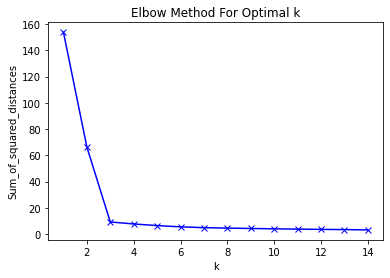

In [27]:

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3.

In [29]:
x = data.iloc[:, [0, 1, 2, 3]].values

# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

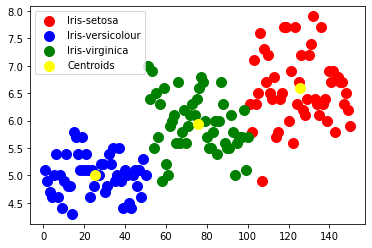

In [30]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()